# Your own Dataset Google Images

*inspired by: Jeremy Howard*

In [2]:
from fastai.vision import *

## Get a list of URLs
Search using [Google Images](http://images.google.com) for "new york" and "wroclaw" and save it in .csv as described below

How to fetch images you see on google search as download.csv

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

## Fetch

In [72]:
!ls data

cities


In [73]:
path = Path('data')/"cities"

In [74]:
list(path.glob("*.csv"))

[PosixPath('data/cities/ny.csv'), PosixPath('data/cities/wroc.csv')]

In [75]:
classes=[]
for f in path.glob("*.csv"):
    d = path/f.stem
    classes.append(f.stem)
    if not d.exists():
        d.mkdir(parents=True)
        print("Fetching", f)
        download_images(f, d, max_pics=200)

In [76]:
classes

['ny', 'wroc']

In [77]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

ny


wroc


## View data

In [85]:
path.ls()

[PosixPath('data/cities/.ipynb_checkpoints'),
 PosixPath('data/cities/ny'),
 PosixPath('data/cities/wroc'),
 PosixPath('data/cities/models'),
 PosixPath('data/cities/ny.csv'),
 PosixPath('data/cities/wroc.csv')]

In [112]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(flip_vert=True), size=224, num_workers=4, classes=classes).normalize(imagenet_stats)

In [113]:
data.classes

['ny', 'wroc']

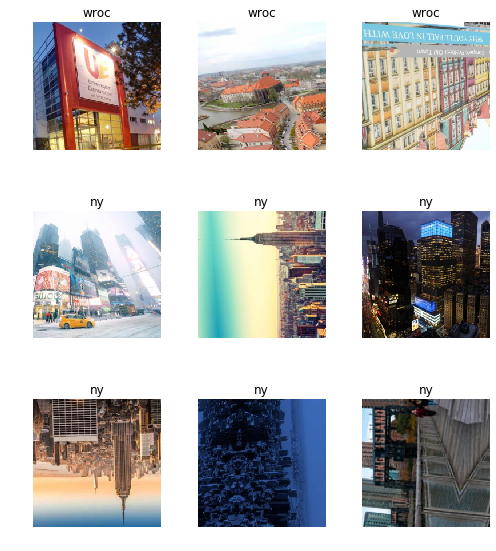

In [114]:
data.show_batch(rows=3, figsize=(7,8))

In [115]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ny', 'wroc'], 2, 308, 76)

In [117]:
np.unique(list(map(str,data.train_ds.y)), return_counts=True)

(array(['ny', 'wroc'], dtype='<U4'), array([144, 164]))

## Train model

In [118]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [119]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.880633,0.545391,0.263158
2,0.696719,0.537039,0.250000
3,0.596841,0.516386,0.236842
4,0.533915,0.496792,0.223684


In [120]:
learn.save('stage-1')

In [121]:
learn.unfreeze()

In [122]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


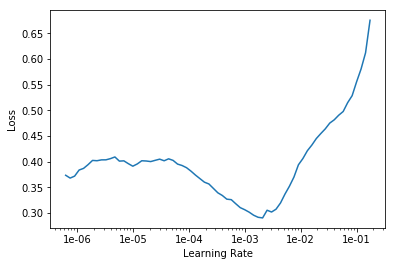

In [123]:
learn.recorder.plot()

In [124]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.411948,0.481217,0.210526
2,0.353840,0.451278,0.144737


In [125]:
learn.save('stage-2')

## Interpretation

In [126]:
learn.load('stage-2');

In [127]:
interp = ClassificationInterpretation.from_learner(learn)

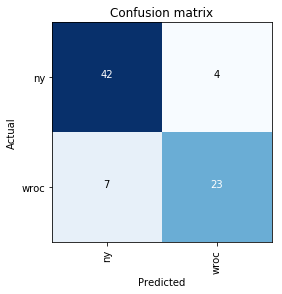

In [128]:
interp.plot_confusion_matrix()

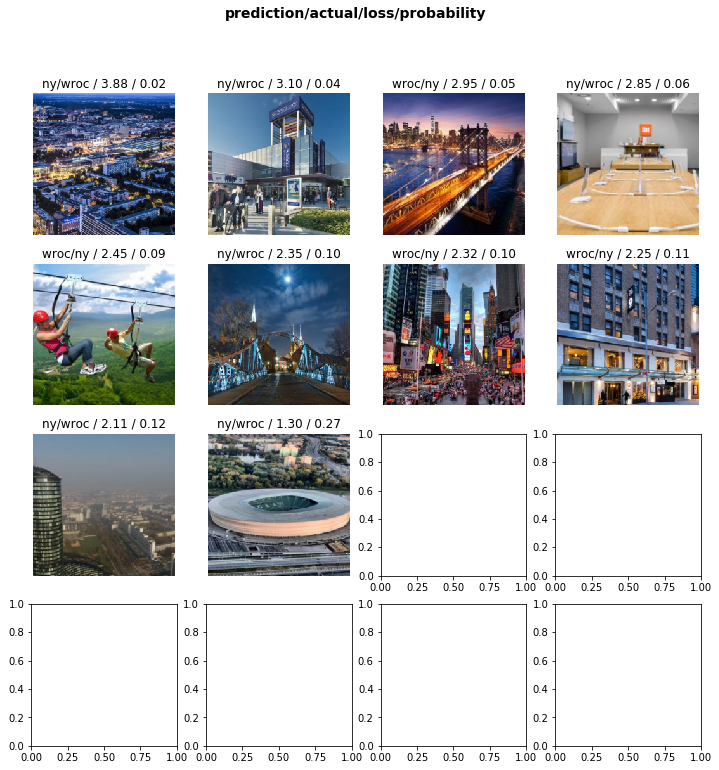

In [129]:
interp.plot_top_losses(10)

# Predict

In [142]:
fn=path.parent/"City3.jpeg"
!ls {fn}

data/City3.jpeg


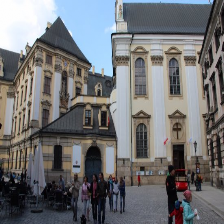

In [143]:
img=open_image(fn).resize(224);img

In [144]:
learn.predict(img)

(Category wroc, tensor(1), tensor([0.2587, 0.7413]))